In [34]:
import numpy as np
#change file_path
file_path = '/Users/yass/Desktop/DS_M2/HMM/Irs/ok/80_4_4_25_3_20.npz'
data = np.load(file_path)
sigma = data["sigma_y"]


In [35]:
sigma

array(0.62918423)

In [36]:
mcg = data["MCG_DIFF"]
posterior = data["posterior"]
prior = data["prior"]
d_x = data["D_X"]
d_y = data["D_Y"]

In [24]:
mcg.shape

(2000, 80)

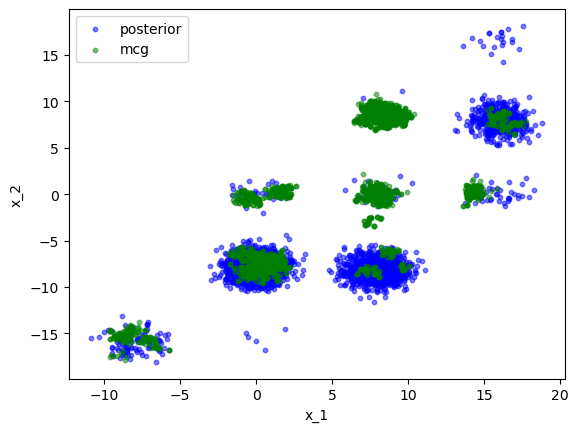

In [37]:
posterior_x1 = posterior[:,0]
posterior_x2 = posterior[:,1] 

mcg_x1 = mcg[:,0]
mcg_x2 = mcg[:,1]
#mcg_x1 = np.concatenate((mcg_x1_1,mcg_x1_2))
#mcg_x2 = np.concatenate((mcg_x2_1,mcg_x2_2))
import matplotlib.pyplot as plt 
plt.scatter(posterior_x1,posterior_x2, s=10, alpha=0.5, color='blue', label='posterior')
plt.scatter(mcg_x1,mcg_x2, s = 10, alpha =0.5, color='green', label='mcg')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend()


In [38]:
posterior_x1 = posterior[:,0] 
posterior_x1.shape
prior[1].shape
#mcg.T[0].shape
#posterior.T[0].shape
random_indices = np.random.randint(0, 500, size=500)
mcg[:,0][random_indices].shape



(500,)

In [39]:
from scipy.stats import wasserstein_distance
import numpy as np

def wasserstein_distance_manual(x, y, slices):
    # Sort the arrays in ascending order
    x_sorted = np.sort(x)
    y_sorted = np.sort(y)
    x_cumsum = np.cumsum(x_sorted)
    y_cumsum = np.cumsum(y_sorted)
    
    x_cumsum_norm = x_cumsum / np.sum(x_sorted)
    y_cumsum_norm = y_cumsum / np.sum(y_sorted)
    
    abs_diff = np.abs(x_cumsum_norm - y_cumsum_norm)
    
    swd_slices = []
    for i in range(slices):
        start = int(i * len(abs_diff) / slices)
        end = int((i + 1) * len(abs_diff) / slices)
        swd_slice = np.sum(abs_diff[start:end])
        swd_slices.append(swd_slice)
    
    return swd_slices

posterior_flat = posterior_x1.flatten()
mcg_flat = mcg_x1.flatten()

slices = 100
swd_slices = wasserstein_distance_manual(posterior_flat, mcg_flat, slices)
swd_slices
mean_swd = np.mean(swd_slices)
mean_swd


1.9465516

In [102]:
import glob

# Specify the directory path where the .npz files are located
directory_path = '/Users/yass/Desktop/DS_M2/HMM/Irs/steps'
# Path to change, here directory where npz from different steps are located

# Get a list of all .npz files in the directory
npz_files = glob.glob(directory_path + '/*.npz')

# Print the last number from the .npz file names
last_numbers = [int(name.split('_')[-1].split('.')[0]) for name in npz_files]
print(last_numbers)

# Print the names of the .npz files

steps = np.sort(last_numbers)
print(steps)

last_numbers = [int(name.split('_')[-1].split('.')[0]) for name in npz_files]
print(last_numbers)

# Print the names of the .npz files

steps = np.sort(last_numbers)
print(steps)

[400, 200, 20, 500, 100, 300, 250, 450, 150, 350]
[ 20 100 150 200 250 300 350 400 450 500]
[400, 200, 20, 500, 100, 300, 250, 450, 150, 350]
[ 20 100 150 200 250 300 350 400 450 500]


In [40]:
mcg.shape

(3000, 80)

[ 20 100 150 200 250 300 350 400 450 500]


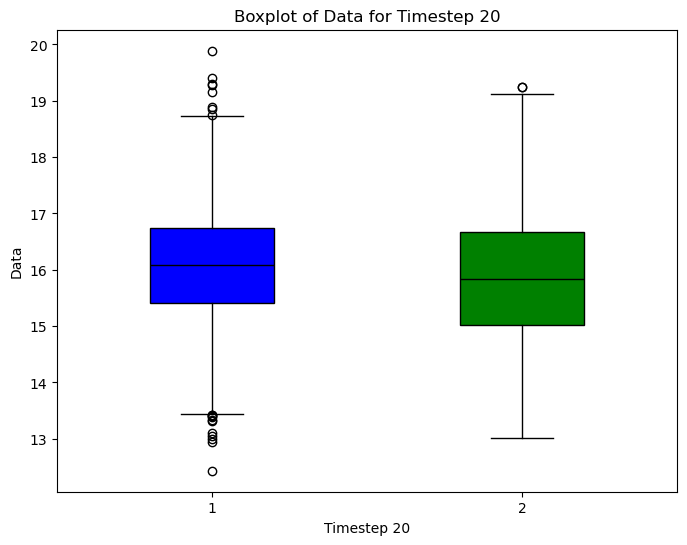

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Define the timesteps list
timesteps = steps
print(timesteps)

# Create empty lists to store the boxplot data
mcg_data_list = []
posterior_data_list = []

file_path = f'/Users/yass/Desktop/DS_M2/HMM/Irs/steps/80_4_4_25_3_20.npz'
data = np.load(file_path)
mcg = data["MCG_DIFF"]
posterior = data["posterior"]

mcg_data = mcg[:, 0]
posterior_data = posterior[:, 0]

# Append the data to the respective lists
mcg_data_list.append(mcg_data)
posterior_data_list.append(posterior_data)

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create the boxplot using the lists of data
ax.boxplot(posterior_data_list, positions=[1], widths=0.4, patch_artist=True, boxprops=dict(facecolor='blue'), medianprops=dict(color='black'))
ax.boxplot(mcg_data_list, positions=[2], widths=0.4, patch_artist=True, boxprops=dict(facecolor='green'), medianprops=dict(color='black'))
# Set the labels and title
ax.set_xlabel('Timestep 20')
ax.set_ylabel('Data')
ax.set_title('Boxplot of Data for Timestep 20')

# Show the plot
plt.show()


[ 20 100 150 200 250 300 350 400 450 500]


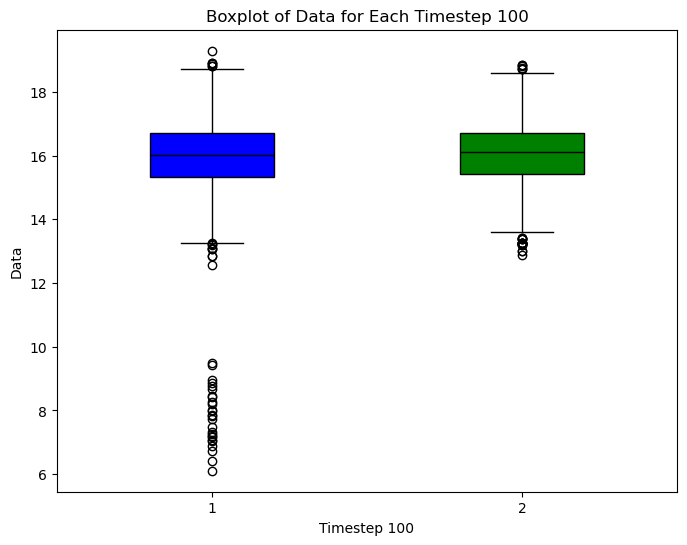

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Define the timesteps list
timesteps = steps
print(timesteps)

# Create empty lists to store the boxplot data
mcg_data_list = []
posterior_data_list = []

file_path = f'/Users/yass/Desktop/DS_M2/HMM/Irs/steps/80_4_4_25_3_100.npz'
data = np.load(file_path)
mcg = data["MCG_DIFF"]
posterior = data["posterior"]

mcg_data = mcg[:, 0]
posterior_data = posterior[:, 0]

# Append the data to the respective lists
mcg_data_list.append(mcg_data)
posterior_data_list.append(posterior_data)

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create the boxplot using the lists of data
ax.boxplot(posterior_data_list, positions=[1], widths=0.4, patch_artist=True, boxprops=dict(facecolor='blue'), medianprops=dict(color='black'))
ax.boxplot(mcg_data_list, positions=[2], widths=0.4, patch_artist=True, boxprops=dict(facecolor='green'), medianprops=dict(color='black'))
# Set the labels and title
ax.set_xlabel('Timestep 100')
ax.set_ylabel('Data')
ax.set_title('Boxplot of Data for Each Timestep 100')

# Show the plot
plt.show()
